# Sae 15



## Métrique 2.1



## Métrique 2.2 : la mémoire


### Récuperation des données 

Le but du travail sur cette métrique est de récuperer différentes données sur la mémoire a différents instants sur un système Linux. Pour cela, il va falloir utiliser le fichier `/proc/meminfo` qui contient beaucoup d'infromations. Nous allons ici nous concentrer sur les données `MemTotal`, `MemFree`, `MemAvilable`, `SwapCached`, `SwapTotal` et `SwapFree`.

En plus de récuperer ces données, il va falloir faire un 2<sup>ème</sup> script, permettant de les faire varier pour les rendre intéressantes.

Tout d'abord, pour pouvoir créer un fichier csv clair, j'ai décidé de faire un script appelé `resetScript.sh` qui permet de vider le fichier `data.csv` et de mettre des noms de colonnes.

<br>

```bash
#!/bin/bash
# created by Brewal Guyon
# last modification 17-11-22

line="time,MemTotal,MemFree,MemAvilable,SwapCached,SwapTotal,SwapFree"
echo $line > data.csv

exit 0
```

Maintentant que le fichier peut être recréé de façon propre, passons a la capture de données.

<br>

```bash

#!/bin/bash
# created by Brewal Guyon
# last modification 17-11-22

location='/proc/meminfo'

# on récupere les données qui nous interesse
res=`cat $location | grep -E "^(Mem|Swap)"`

# on ajoute la date en début de ligne
echo -n `date +'%s'`, >> /root/Documents/sae15/data.csv

IFS=$'\n'

for d in $res:
do
    # on ajoute les lignes 1 a 1 avec des "," entre chaques
   line=$line`echo $d | tr -s ' ' | tr -d ':' |  cut -d ' ' -f 2-3`,
done

# on ajoute les lignes au fichier csv en enlevant la dernière ","
echo -n ${line::-1} >> /root/Documents/sae15/data.csv

# on saute une ligne pour être prêt a écrire la prochaine donnée
echo "" >> /root/Documents/sae15/data.csv

exit 0
```

Une fois ce fichier fait, il ne reste plus qu'à faire le script pour varier les données.

<br>

```bash
#!/bin/bash
# created by Brewal Guyon
# last modification 24-11-22



a="hello"

# augmentation de la taille de la variable
for i in {0..8}
do
a=$a$a$a$a$a
done

echo taille de la variable : $(echo $a | wc -c)
# cree une variable assez longue, pour faire varier la memoire

for i in {0..10}
do
echo phase $i/10 du script

echo mise en pause du script pendant 60s 
sleep 60

echo changement de la taille de la variable
a=$a$a
echo taille de la variable : $(echo $a | wc -c)
done

exit 0
```

Maintentant que tous les script ont été, il ne reste plus qu'à automatiser la tache de lancement du script de capture de données toutes les minutes pour avoir un fichier csv complet. Pour cela, nous allons utiliser cron avec la ligne suivant : 

```
*/1 * * * * bash /root/Documents/sae15/script.sh > /root/Documents/erreurs
```

Cette capture a donc permi, avec quelques lancement du script de varaitions de données de donner ce fichier csv (seulement le début).

<br>


```csv
time,MemTotal,MemFree,MemAvilable,SwapCached,SwapTotal,SwapFree
1669311481,2037564 kB,359272 kB,1392400 kB,0 kB,998396 kB,998396 kB
1669311541,2037564 kB,346364 kB,1380152 kB,0 kB,998396 kB,998396 kB
1669311601,2037564 kB,345064 kB,1378880 kB,0 kB,998396 kB,998396 kB
1669311661,2037564 kB,344756 kB,1378588 kB,0 kB,998396 kB,998396 kB
1669311721,2037564 kB,336212 kB,1379652 kB,0 kB,998396 kB,998396 kB
1669311781,2037564 kB,337700 kB,1381192 kB,0 kB,998396 kB,998396 kB
1669311841,2037564 kB,338464 kB,1381980 kB,0 kB,998396 kB,998396 kB
1669311901,2037564 kB,328656 kB,1372184 kB,0 kB,998396 kB,998396 kB
1669311961,2037564 kB,327840 kB,1371396 kB,0 kB,998396 kB,998396 kB
1669312021,2037564 kB,326372 kB,1369992 kB,0 kB,998396 kB,998396 kB
1669312081,2037564 kB,323392 kB,1367020 kB,0 kB,998396 kB,998396 kB
```

### Traitement des donées

Pour traiter les données, j'ai décidé de créer une classe python avec plusieurs fonctions.

In [1]:
import csv
from typing import List, Tuple

In [2]:
class data_handler:
    """! Classe qui va servir a interagir avec le fichier csv
    """

    def __init__(self, filename:str, separateur=',') -> None:
        """! Creation de la classe qui va servir aux interactions avec le fichier csv
        
        @param filename  nom du fichier csv a charger
        @param separateur  separateur des colonnes du fichier csv
        """
        self.separateur : str = separateur
        
        self.filename : str = filename
        
        self.lines : List[str] = []
        
        self.raw : str = ""
        
        with open(filename, newline='') as csvfile :
            datareader : csv._reader = csv.reader(csvfile, delimiter=self.separateur, quotechar='|')
            
            for line in datareader:
                # ajouter les lignes a la liste
                self.lines.append(line)
                
                # ajouter les lignes sous la forme de string dans le string
                self.raw += ",".join(line) + "\n"

In [3]:
class data_handler(data_handler):
    def get_raw_data_in_string(self) -> str:
            """! Renvoie les données brutes du fichier csv en format string
            
            @return  les données du fichier en dur
            """
            return self.raw

myData = data_handler("../data.csv")
print(myData.get_raw_data_in_string())

time,MemTotal,MemFree,MemAvilable,SwapCached,SwapTotal,SwapFree
1669311481,2037564 kB,359272 kB,1392400 kB,0 kB,998396 kB,998396 kB
1669311541,2037564 kB,346364 kB,1380152 kB,0 kB,998396 kB,998396 kB
1669311601,2037564 kB,345064 kB,1378880 kB,0 kB,998396 kB,998396 kB
1669311661,2037564 kB,344756 kB,1378588 kB,0 kB,998396 kB,998396 kB
1669311721,2037564 kB,336212 kB,1379652 kB,0 kB,998396 kB,998396 kB
1669311781,2037564 kB,337700 kB,1381192 kB,0 kB,998396 kB,998396 kB
1669311841,2037564 kB,338464 kB,1381980 kB,0 kB,998396 kB,998396 kB
1669311901,2037564 kB,328656 kB,1372184 kB,0 kB,998396 kB,998396 kB
1669311961,2037564 kB,327840 kB,1371396 kB,0 kB,998396 kB,998396 kB
1669312021,2037564 kB,326372 kB,1369992 kB,0 kB,998396 kB,998396 kB
1669312081,2037564 kB,323392 kB,1367020 kB,0 kB,998396 kB,998396 kB
1669312141,2037564 kB,317836 kB,1361504 kB,0 kB,998396 kB,998396 kB
1669312201,2037564 kB,328360 kB,1372816 kB,0 kB,998396 kB,998396 kB
1669312261,2037564 kB,327672 kB,1372184 kB,0 kB,9983

In [4]:
class data_handler(data_handler):
    def get_data_in_list(self, first_line:bool=False) -> List[List[str]]:
        """! Renvoie une liste a 2 dimensions qui contient les differentes donnees en string
        
        Exemple pour le fihier csv
        a, b, c
        d, e, f
        g, h, i
        
        >> [[a, b, c], [d, e, f], [g, h, i]]
        
        @param first_line  si first_line est a False alors la premier ligne n'est pas prise en compte

        @return  la liste de liste représentant les donées
        """
        return self.lines[1:] if not first_line else self.line

myData = data_handler("../data.csv")
print(myData.get_data_in_list())    

[['1669311481', '2037564 kB', '359272 kB', '1392400 kB', '0 kB', '998396 kB', '998396 kB'], ['1669311541', '2037564 kB', '346364 kB', '1380152 kB', '0 kB', '998396 kB', '998396 kB'], ['1669311601', '2037564 kB', '345064 kB', '1378880 kB', '0 kB', '998396 kB', '998396 kB'], ['1669311661', '2037564 kB', '344756 kB', '1378588 kB', '0 kB', '998396 kB', '998396 kB'], ['1669311721', '2037564 kB', '336212 kB', '1379652 kB', '0 kB', '998396 kB', '998396 kB'], ['1669311781', '2037564 kB', '337700 kB', '1381192 kB', '0 kB', '998396 kB', '998396 kB'], ['1669311841', '2037564 kB', '338464 kB', '1381980 kB', '0 kB', '998396 kB', '998396 kB'], ['1669311901', '2037564 kB', '328656 kB', '1372184 kB', '0 kB', '998396 kB', '998396 kB'], ['1669311961', '2037564 kB', '327840 kB', '1371396 kB', '0 kB', '998396 kB', '998396 kB'], ['1669312021', '2037564 kB', '326372 kB', '1369992 kB', '0 kB', '998396 kB', '998396 kB'], ['1669312081', '2037564 kB', '323392 kB', '1367020 kB', '0 kB', '998396 kB', '998396 kB']

In [14]:
class data_handler(data_handler):
    def get_data_in_list_of_numbers(self) -> List[List[int]]:
        """! Enlève les unitées si il y en a (comme get_data_in_list() mais sans unitées)
        
        @return  la liste de liste contenant les données
        """
        
        numbers : List[int] = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
        number : str = ""
        data : List[List[str]] = self.get_data_in_list()
        newList : List[List[int]] = []
        
        for line in range(len(data)):
            newList.append([])
            for element in range(len(data[line])):
                number = ""
                for char in range(len(data[line][element])):
                    if data[line][element][char] in numbers:
                        number += data[line][element][char]
                newList[-1].append(int(number))
        
        return newList

myData = data_handler("../data.csv")
print(myData.get_data_in_list_of_numbers())

[[1669311481, 2037564, 359272, 1392400, 0, 998396, 998396], [1669311541, 2037564, 346364, 1380152, 0, 998396, 998396], [1669311601, 2037564, 345064, 1378880, 0, 998396, 998396], [1669311661, 2037564, 344756, 1378588, 0, 998396, 998396], [1669311721, 2037564, 336212, 1379652, 0, 998396, 998396], [1669311781, 2037564, 337700, 1381192, 0, 998396, 998396], [1669311841, 2037564, 338464, 1381980, 0, 998396, 998396], [1669311901, 2037564, 328656, 1372184, 0, 998396, 998396], [1669311961, 2037564, 327840, 1371396, 0, 998396, 998396], [1669312021, 2037564, 326372, 1369992, 0, 998396, 998396], [1669312081, 2037564, 323392, 1367020, 0, 998396, 998396], [1669312141, 2037564, 317836, 1361504, 0, 998396, 998396], [1669312201, 2037564, 328360, 1372816, 0, 998396, 998396], [1669312261, 2037564, 327672, 1372184, 0, 998396, 998396], [1669312321, 2037564, 327372, 1371912, 0, 998396, 998396], [1669312381, 2037564, 326592, 1371140, 0, 998396, 998396], [1669312441, 2037564, 325316, 1369872, 0, 998396, 99839

In [15]:
class data_handler(data_handler):
    def average_diff(self, column:int=0) -> float:
        """! Calcule la différence moyenne dans une colonne (par défaut la première colonne)

        @param column  La colonne sur la quelle il faut réaliser l'oppération
        
        @return  La différence moyenne
        """
        
        data = self.get_data_in_list()
        average_time : int = 0
        
        for i in range(1, len(data)):
            average_time += int(data[i][column]) - int(data[i-1][column])
        
        return average_time / (len(data) - 1)

myData = data_handler("../data.csv")
print(myData.average_diff())

60.0


In [16]:
class data_handler(data_handler):
    def average(self, column:int) -> float:
        """! Calcule la moyenne d'une colonne

        @param column  indice de la colonne

        @return  moyenne de la colonne
        """
        
        # donnees sans unitées
        data = self.get_data_in_list_of_numbers()
        average : int = 0
        
        for line in range(len(data)):
            average += data[line][column]
        
        return average / len(data)

myData = data_handler("../data.csv")
print(myData.average(2))

752482.6086956522


In [17]:
class data_handler(data_handler):
    def get_name(self, column:int) -> str:
        """! Renvoie le nom d'une colonne

        @param column  indice de la colonne

        @return  nom de la colonne
        """
        
        return self.lines[0][column]

myData = data_handler("../data.csv")
print(myData.get_name(2))

MemFree


In [18]:
class data_handler(data_handler):
    def get_column(self, column:int) -> List[int]:
        """! Renvoie la colonne en parametre sous forme de liste

        @param column  indice de la colonnne

        @return  Liste contenant les valeurs de la colonne
        """
        
        data = self.get_data_in_list_of_numbers()
        
        result : List[int] = []
        
        for line in range(len(data)):
            result.append(data[line][column])
        
        return result

myData = data_handler("../data.csv")
print(myData.get_column(2))

[359272, 346364, 345064, 344756, 336212, 337700, 338464, 328656, 327840, 326372, 323392, 317836, 328360, 327672, 327372, 326592, 325316, 323332, 318732, 310052, 293416, 258184, 287224, 345384, 703756, 704228, 704180, 681576, 643184, 671056, 632892, 556460, 1001136, 56336, 1525900, 1768964, 1753120, 1751876, 1711572, 1708020, 1708004, 1708060, 1707808, 1705800, 1703500, 1703208]


In [19]:
class data_handler(data_handler):
    def min_max(self, column:int) -> Tuple[float, float]:
        """! Renvoie le couple max, min d'une colonne donnée

        @param column  La colonne en question.

        @return  Le couple max, min
        """
        data = self.get_data_in_list_of_numbers()
        max, min = data[column][0], data[column][0]
        
        for i in range(1, len(data)):
            if data[i][column] > max:
                max = data[i][column]
                
            if data[i][column] < min:
                min = data[i][column]
        
        return min, max

myData = data_handler("../data.csv")
print(myData.min_max(0))

(1669311481, 1669314181)


In [20]:
class data_handler(data_handler):
    def get_data_in_dict(self, column) -> dict:
        """! Récuperer les données sous la forme d'un dictionnaire avec la colonne en paramètre comme clés
        
        @param column  indice de la colonne clés
        
        @return  dictionnaire avec les données
        """
        
        
        data : List[List[int]] = self.get_data_in_list_of_numbers()
        
        dictionnaire : dict = {}
        
        for i in range(len(data)):
            dictionnaire[data[i][column]] = data[i]
            
        return dictionnaire

myData = data_handler("../data.csv")
print(myData.get_data_in_dict(0))

{1669311481: [1669311481, 2037564, 359272, 1392400, 0, 998396, 998396], 1669311541: [1669311541, 2037564, 346364, 1380152, 0, 998396, 998396], 1669311601: [1669311601, 2037564, 345064, 1378880, 0, 998396, 998396], 1669311661: [1669311661, 2037564, 344756, 1378588, 0, 998396, 998396], 1669311721: [1669311721, 2037564, 336212, 1379652, 0, 998396, 998396], 1669311781: [1669311781, 2037564, 337700, 1381192, 0, 998396, 998396], 1669311841: [1669311841, 2037564, 338464, 1381980, 0, 998396, 998396], 1669311901: [1669311901, 2037564, 328656, 1372184, 0, 998396, 998396], 1669311961: [1669311961, 2037564, 327840, 1371396, 0, 998396, 998396], 1669312021: [1669312021, 2037564, 326372, 1369992, 0, 998396, 998396], 1669312081: [1669312081, 2037564, 323392, 1367020, 0, 998396, 998396], 1669312141: [1669312141, 2037564, 317836, 1361504, 0, 998396, 998396], 1669312201: [1669312201, 2037564, 328360, 1372816, 0, 998396, 998396], 1669312261: [1669312261, 2037564, 327672, 1372184, 0, 998396, 998396], 16693

In [21]:
class data_handler(data_handler):
    def get_max_by_refernce(self, column_ref, column_aim) -> int:
        """!Renvoi la valeur de la colonne column_ref pour la valeur max de column_aim
        
        @param column_ref  colonne qui contient la valeur qui va etre renvoyée
        @param column_aim  colonne qui contient les valeurs de référence (c'est ici que le max va etre recherché)

        @return  la valeur trouvé
        """
        
        data : dict = self.get_data_in_dict(column_ref)
        
        max = (list(data.keys())[0], data[list(data.keys())[0]][column_aim])
        
        for key,values in data.items():
            
            if max[1] < values[column_aim]:
                max = (key, values[column_aim])
                
        return max[0]

myData = data_handler("../data.csv")
print(myData.get_max_by_refernce(0, 3))

1669313581


Maintenant que les fonctions pour traiter les données ont été créées, il reste a les utiliser avec matplotlib

### Affichage des graphs

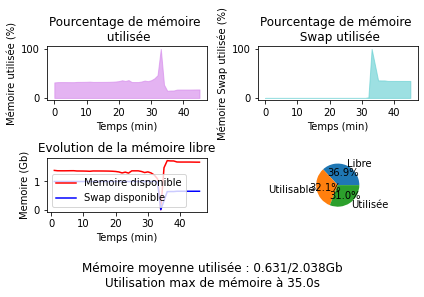

In [23]:
import matplotlib.pyplot as plt

myData = data_handler("../data.csv")
fig, ax = plt.subplots(2, 2)


#################### graphe en 2,1 (comparaison swap et mem)

y1 = myData.get_column(3)
y2 = myData.get_column(6)
x = [i for i in range(1, len(y1) + 1)]

for i in range(len(y1)):
    y1[i] = y1[i]/10**6
    y2[i] = y2[i]/10**6

ax[1, 0].plot(x, y1, 'r-', label="Memoire disponible")
ax[1, 0].plot(x, y2, 'b-', label="Swap disponible")


ax[1, 0].set_title("Evolution de la mémoire libre")
ax[1, 0].set_xlabel("Temps (min)")
ax[1, 0].set_ylabel("Memoire (Gb)")
ax[1, 0].legend()


############### graphe en 1, 1 (pourcentage d'utilisation de la mémoire)

y_mem = myData.get_column(3) # memoire disponible
x = [i for i in range(len(y_mem))]

mem_totale = myData.get_column(1)[0] # memoire totale

ligne_nulle = [0] * len(y_mem)

pourcentage = [round((mem_totale - y_mem[i]) / mem_totale, 5)*100 for i in range(len(y_mem))] # pourcentage de memoire utilisee


ax[0, 0].fill_between(x, ligne_nulle, pourcentage, color="#d487eba0")

ax[0, 0].set_title("Pourcentage de mémoire \n utilisée")
ax[0, 0].set_xlabel("Temps (min)")
ax[0, 0].set_ylabel("Mémoire utilisée (%)")

######################### graph en 1,2 (pourcentage d'utilisation de la meme Swap)

y_mem = myData.get_column(6) # memoire swap disponible
x = [i for i in range(len(y_mem))]

mem_totale = myData.get_column(5)[0] # memoire swap totale

ligne_nulle = [0] * len(y_mem)

pourcentage = [round((mem_totale - y_mem[i]) / mem_totale, 5)*100 for i in range(len(y_mem))] # pourcentage de memoire utilisée


ax[0, 1].fill_between(x, ligne_nulle, pourcentage, color="#64cfd1a0")

ax[0, 1].set_title("Pourcentage de mémoire \n Swap utilisée")
ax[0, 1].set_xlabel("Temps (min)")
ax[0, 1].set_ylabel("Mémoire Swap utilisée (%)")

################### camembert memoire moyenne et libre

mem_total = myData.get_column(1)[0]
average_mem_free = (myData.average(2) / mem_total) * 100
average_mem_available = (myData.average(3) / mem_total) * 100

values = [average_mem_free, average_mem_available - average_mem_free, 100 - average_mem_available]
labels = ["Libre", "Utilisable", "Utilisée"]

ax[1, 1].pie(values, labels=labels, autopct='%1.1f%%')

############## affichage des valeurs

to_print = f"Mémoire moyenne utilisée : {round(myData.average(1)/10**6 - myData.average(3)/10**6, 3)}/{round(myData.average(1)/10**6, 3)}Gb\n"
to_print += f"Utilisation max de mémoire à {(myData.get_max_by_refernce(0, 3) - myData.get_column(0)[0])/60}s"
fig.supxlabel(to_print)

plt.tight_layout()
plt.show()